<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Boosting

A powerful ensemble technique that builds upon the idea of boosting, but introduces a new perspective to it.

**Simple Explanation:**

*Imagine you're playing a game where you're trying to hit a target, but you keep missing. Each time you miss, you see where your shot landed and adjust your aim to get closer to the target. Over a series of attempts, by correcting your mistakes from the previous shots, you eventually hit the target.*

This is similar to what Gradient Boosting does. Initially, it makes a guess (often a naive one). It then looks at where it made mistakes (the residuals or the difference between the predicted and actual values). In the next step, it tries to predict these residuals (or mistakes). This is like adjusting your aim based on the last mistake. It continues doing this, adjusting for the mistakes of the previous rounds, until a stopping criterion is met.

**Theory in More Detail:**

> Initialization: Start with an initial model. This could be a very naive model, often just a constant value, like the mean of the target variable.

**For each iteration:**

> Calculate the residuals (differences between predicted values and actual values).
Fit a new model (often a shallow decision tree, but it can be another type of model) to predict these residuals.
Update the predictions by adding the predictions of the new model (multiplied by a learning rate) to the old predictions. This is like adjusting your aim in the game analogy.
Final Model Output: The final prediction is the sum of the initial model's prediction and the weighted predictions of all subsequent models.

**Formula Simplification:**

If you consider the actual formulas and the calculus behind Gradient Boosting, it can get complex due to its relation to gradient descent optimization. But, to simplify:

Predicted value at step m = Previous predicted value + (Learning rate × Prediction of residuals by the new model)

Residuals at step m = Actual value - Predicted value at step m


The "Learning rate" is a small positive number, usually between 0 and 1. It controls how much we adjust based on the mistakes of the previous models.
A smaller learning rate means we'll make more careful, smaller adjustments, which can lead to more accurate models but may require more boosting rounds.

*In essence, Gradient Boosting is a step-by-step refinement process where each subsequent model tries to correct the mistakes of the combined ensemble of all preceding models.*

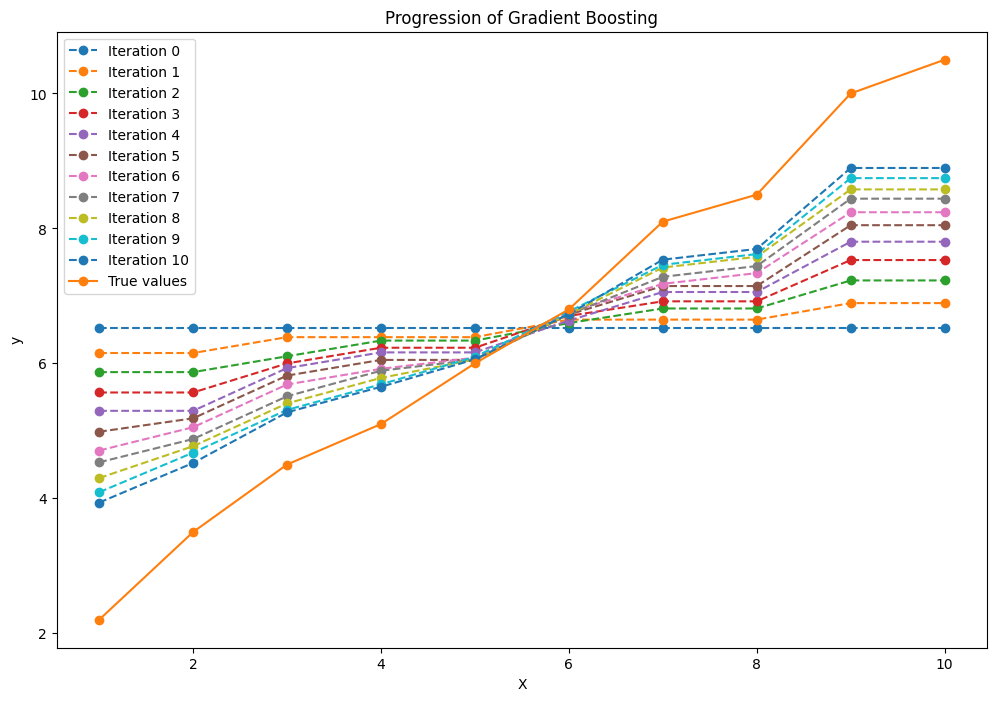

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Toy dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([2.2, 3.5, 4.5, 5.1, 6.0, 6.8, 8.1, 8.5, 10.0, 10.5])

# Parameters
n_samples = X.shape[0]
n_learners = 10
learning_rate = 0.1

# Initialization: Start with mean of y as the initial prediction
initial_prediction = np.mean(y)
y_pred = np.full(n_samples, initial_prediction)

# Lists to store subsequent models and their predictions
learners = []
predictions = [y_pred.copy()]

# Gradient Boosting
for _ in range(n_learners):
    residuals = y - y_pred
    learner = DecisionTreeRegressor(max_depth=2)
    learner.fit(X, residuals)
    update = learner.predict(X)
    y_pred += learning_rate * update

    learners.append(learner)
    predictions.append(y_pred.copy())

# Plotting the progression
plt.figure(figsize=(12, 8))
for i, y_pred in enumerate(predictions):
    plt.plot(X, y_pred, label=f"Iteration {i}", linestyle='--', marker='o')
plt.plot(X, y, 'o-', label="True values")
plt.legend()
plt.title("Progression of Gradient Boosting")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
